In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Reading and Understanding Data

In [2]:
data_negara = pd.read_csv('Data_Negara_HELP.csv')
data_negara.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data_negara.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
data_negara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# 2. EDA

### Data Cleaning

In [5]:
data_negara.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Tidak ada kolom pada dataset yang berisi nilai kosong

### Univariate Analysis

Analisis univariate dilakukan dengan cara membentuk ranking dari kolom - kolom data yang ada untuk merepresentasikan aspek terburuk sebuah negara. Contohnya adalah angk

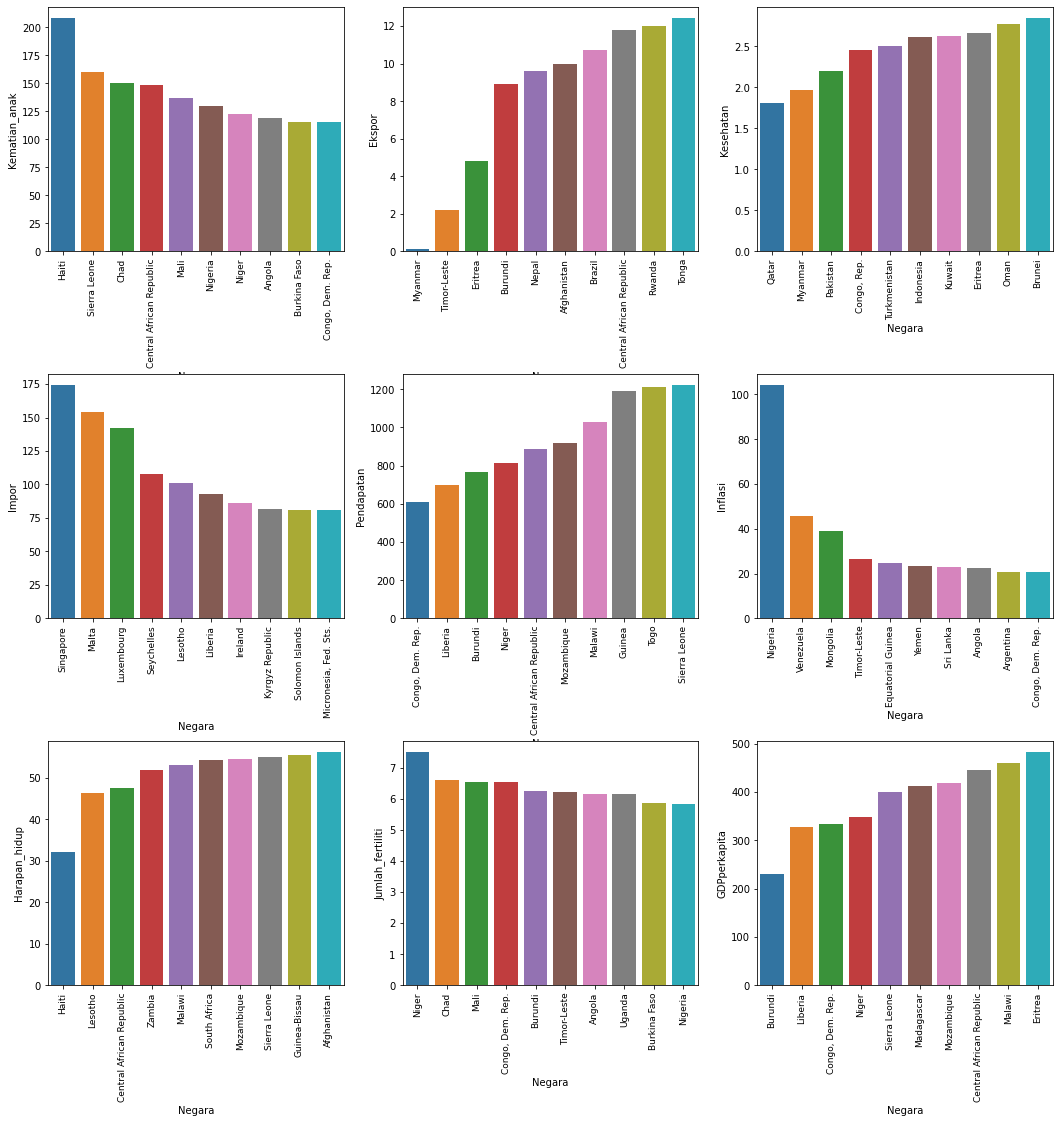

In [6]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (18,18))
data_plot = []
for count, values in enumerate(data_negara.columns):
    if (count == 0):
        continue
    elif ((values == 'Kematian_anak') | (values == 'Inflasi') | (values == 'Jumlah_fertiliti') | (values == 'Impor') ):
        values = data_negara[['Negara',values]].sort_values(values, ascending = False).head(10)
        data_plot.append(values)
    else:
        values = data_negara[['Negara',values]].sort_values(values, ascending = True).head(10)
        data_plot.append(values)
count = 0
for i in range(3):
    for j in range(3):
        sns.barplot(data = data_plot[count], x =  'Negara', y = data_plot[count].columns[1], ax = ax[i][j])
        count += 1
fig.subplots_adjust(hspace=.5)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90, fontsize = 9)
plt.show()

In [7]:
pd.merge(data_plot[8], data_plot[7], on = 'Negara', how = 'inner')

,Negara,GDPperkapita,Jumlah_fertiliti
0,Burundi,231,6.26
1,"Congo, Dem. Rep.",334,6.54
2,Niger,348,7.49


3 Negara dari 10 negara dengan tingkat fertilitas tertinggi termasuk dalam 10 Negara dengan GDPP terendah

In [8]:
pd.merge(data_plot[8], data_plot[0], on = 'Negara', how = 'inner')

,Negara,GDPperkapita,Kematian_anak
0,"Congo, Dem. Rep.",334,116.0
1,Niger,348,123.0
2,Sierra Leone,399,160.0
3,Central African Republic,446,149.0


Keempat negara teratas masuk dalam 10 negara dengan GDP terendah dan kematian anak tertinggi. Hal tersebut menunjukkan tingkat kemakmuran negara yang rendah.

In [9]:
pd.merge(data_plot[8], data_plot[4], on = 'Negara', how = 'inner')

,Negara,GDPperkapita,Pendapatan
0,Burundi,231,764
1,Liberia,327,700
2,"Congo, Dem. Rep.",334,609
3,Niger,348,814
4,Sierra Leone,399,1220
5,Mozambique,419,918
6,Central African Republic,446,888
7,Malawi,459,1030


7 Negara dengan pendapatan per kapita terendah termasuk dalam 10 negara dengan GDPP terendah.

In [10]:
pd.merge(data_plot[8], data_plot[6], on = 'Negara', how = 'inner')

,Negara,GDPperkapita,Harapan_hidup
0,Sierra Leone,399,55.0
1,Mozambique,419,54.5
2,Central African Republic,446,47.5
3,Malawi,459,53.1


4 Negara dengan harapan hidup terendah termasuk dalam 10 negara dengan GDPP terendah.

In [11]:
pd.merge(data_plot[4], data_plot[5], on = 'Negara', how = 'inner')

,Negara,Pendapatan,Inflasi
0,"Congo, Dem. Rep.",609,20.8


In [12]:
pd.merge(data_plot[0], data_plot[6], on = 'Negara', how = 'inner')

,Negara,Kematian_anak,Harapan_hidup
0,Haiti,208.0,32.1
1,Sierra Leone,160.0,55.0
2,Central African Republic,149.0,47.5


Ketiga negara tersebut termasuk dalam 10 negara dengan tingkat kematian anak tertinggi dan harapan hidup terendah

### Bivariate Analysis

[Text(0.5, 1.0, 'Hubungan antara GDPperkapita vs Pendapatan vs Harapan hidup')]

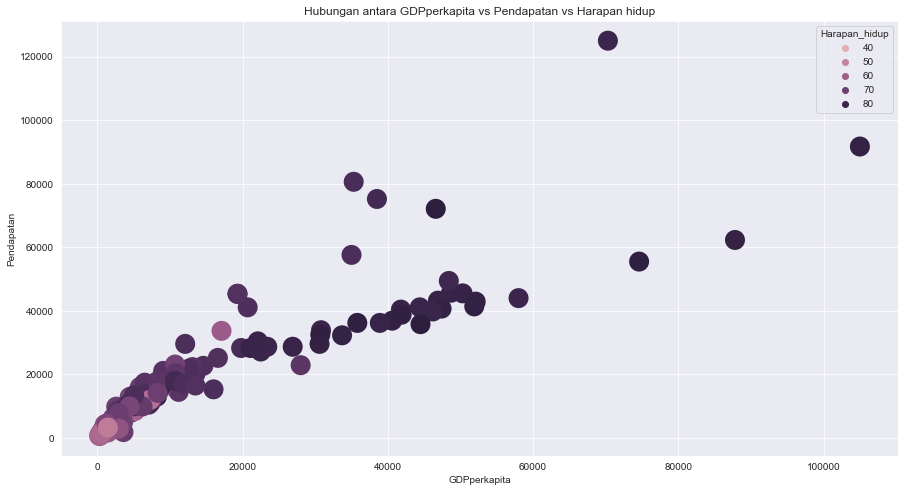

In [13]:
sns.set({'figure.figsize':(15,8)})
sns.scatterplot(data = data_negara, x = 'GDPperkapita', y ='Pendapatan', hue = 'Harapan_hidup',linewidth = 0,s=400).set(title = 'Hubungan antara GDPperkapita vs Pendapatan vs Harapan hidup')

[Text(0.5, 1.0, 'Hubungan antara GDPperkapita vs Pendapatan vs Tingkat Fertilitas')]

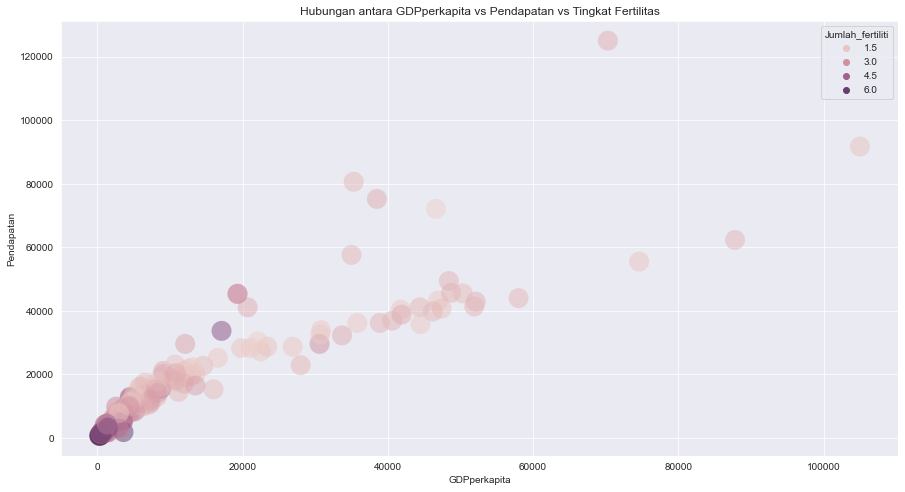

In [14]:
sns.set({'figure.figsize':(15,8)})
sns.scatterplot(data = data_negara, x = 'GDPperkapita', y ='Pendapatan', hue = 'Jumlah_fertiliti',linewidth = 0,alpha = 0.5, s=400).set(title = 'Hubungan antara GDPperkapita vs Pendapatan vs Tingkat Fertilitas')

[Text(0.5, 1.0, 'Hubungan antara GDPperkapita vs Pendapatan vs Tingkat Kematian Anak')]

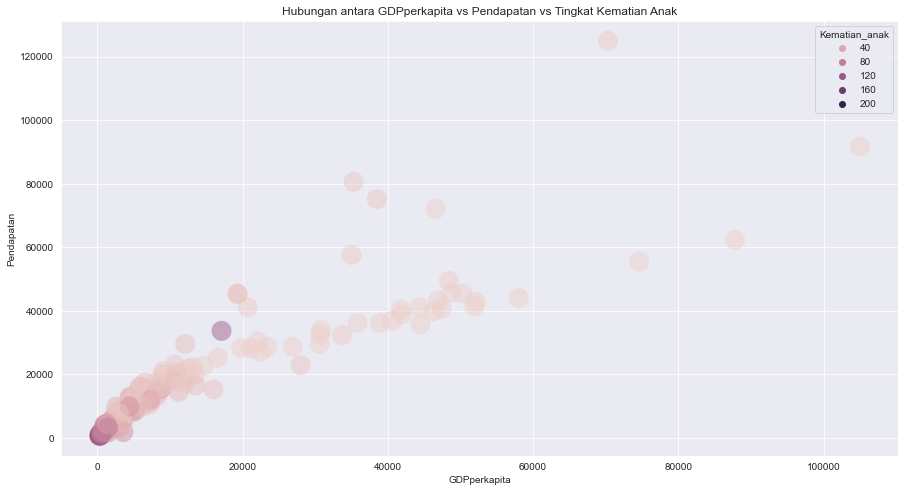

In [15]:
sns.set({'figure.figsize':(15,8)})
sns.scatterplot(data = data_negara, x = 'GDPperkapita', y ='Pendapatan', hue = 'Kematian_anak',linewidth = 0,alpha = 0.5, s=400).set(title = 'Hubungan antara GDPperkapita vs Pendapatan vs Tingkat Kematian Anak')

[Text(0.5, 1.0, 'Hubungan antara Jumlah fertiliti vs Tingkat Kematian anak vs Tingkat Harapan hidup')]

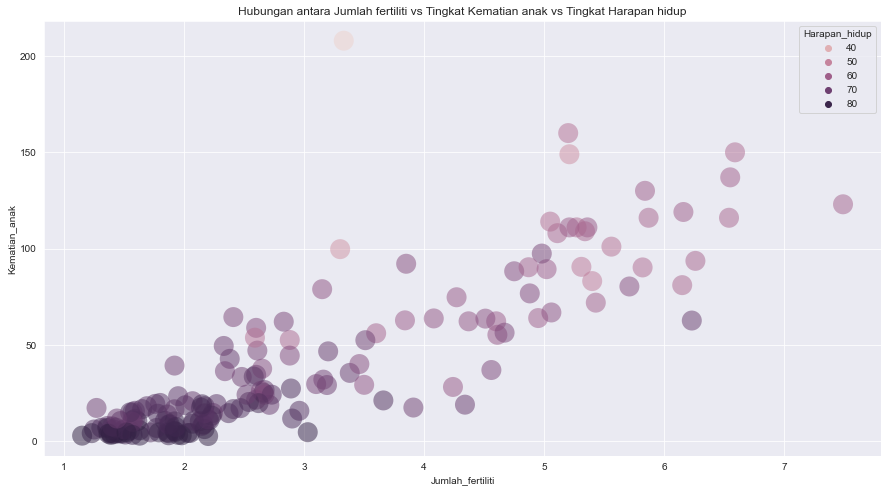

In [16]:
sns.set({'figure.figsize':(15,8)})
sns.scatterplot(data = data_negara, x = 'Jumlah_fertiliti', y ='Kematian_anak', hue = 'Harapan_hidup',linewidth = 0,alpha = 0.5, s=400).set(title = 'Hubungan antara Jumlah fertiliti vs Tingkat Kematian anak vs Tingkat Harapan hidup')

Terlihat ada hubungan linear antara GDPperkapita dengan pendapatan per kapita. Maka

### Multivariate Analysis

<AxesSubplot:>

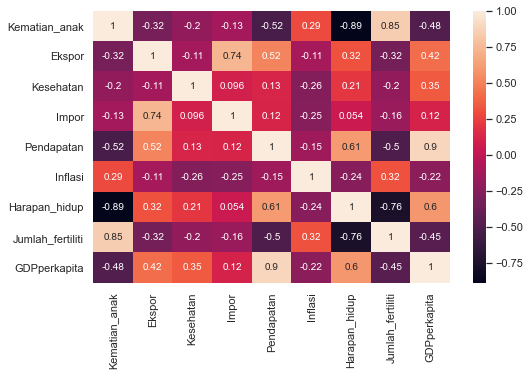

In [17]:
sns.set(rc={'figure.figsize': (8,5)})
sns.heatmap(data_negara.corr(),annot = True, annot_kws={'size': 10})

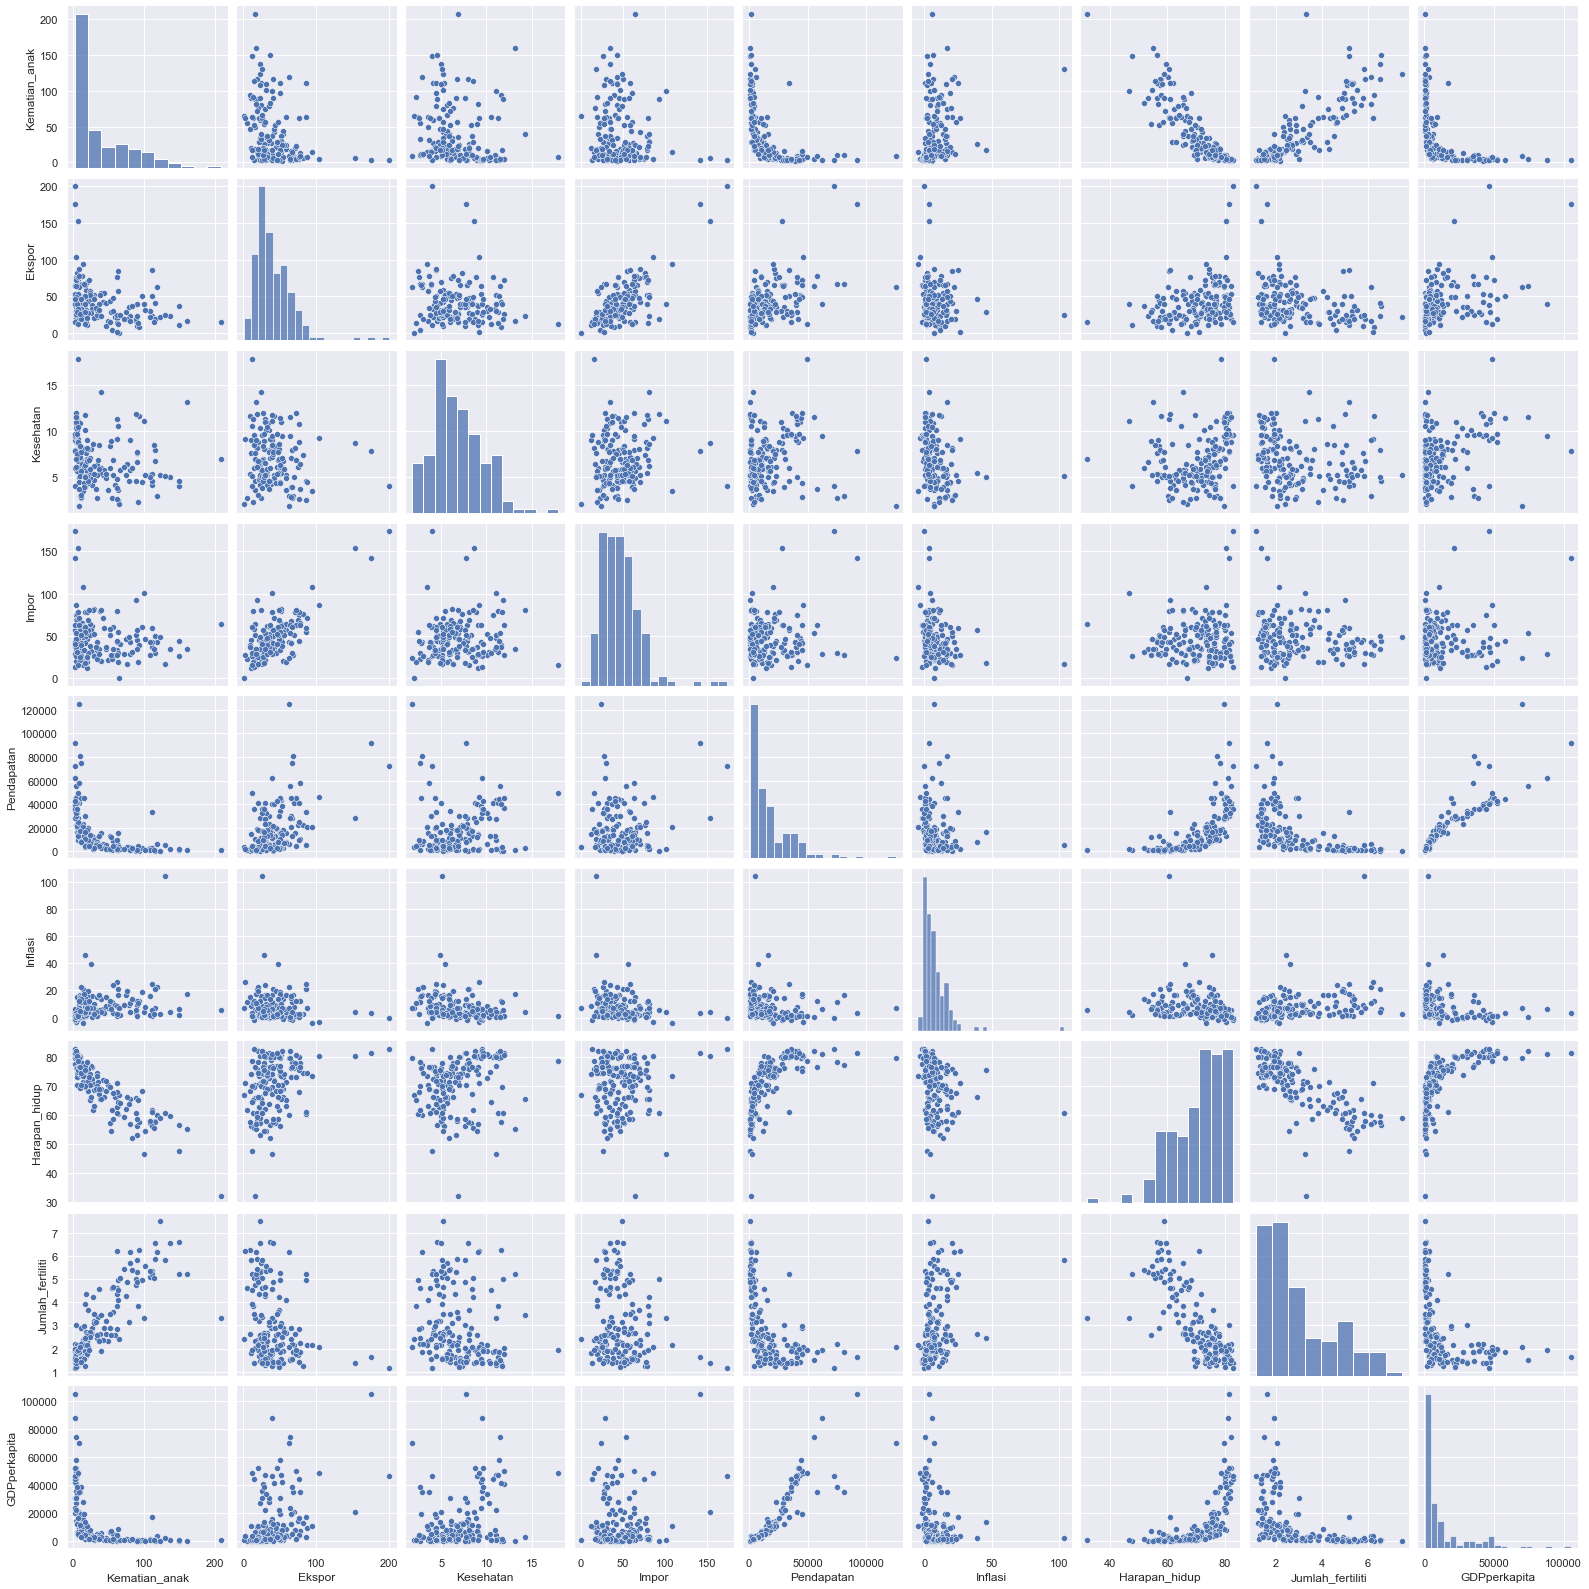

In [18]:
sns.pairplot(data = data_negara)

# 3. Outlier Treatment

In [19]:
def get_bound(data):
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_bound = data.quantile(0.25) - (iqr*1.5)
    upper_bound = data.quantile(0.75) + (iqr*1.5)
    return lower_bound, upper_bound

def get_outliers(data):
    lower_bound, upper_bound = get_bound(data)
    return ((data > upper_bound) | (data < lower_bound))

#### Sebelum Handling Outlier

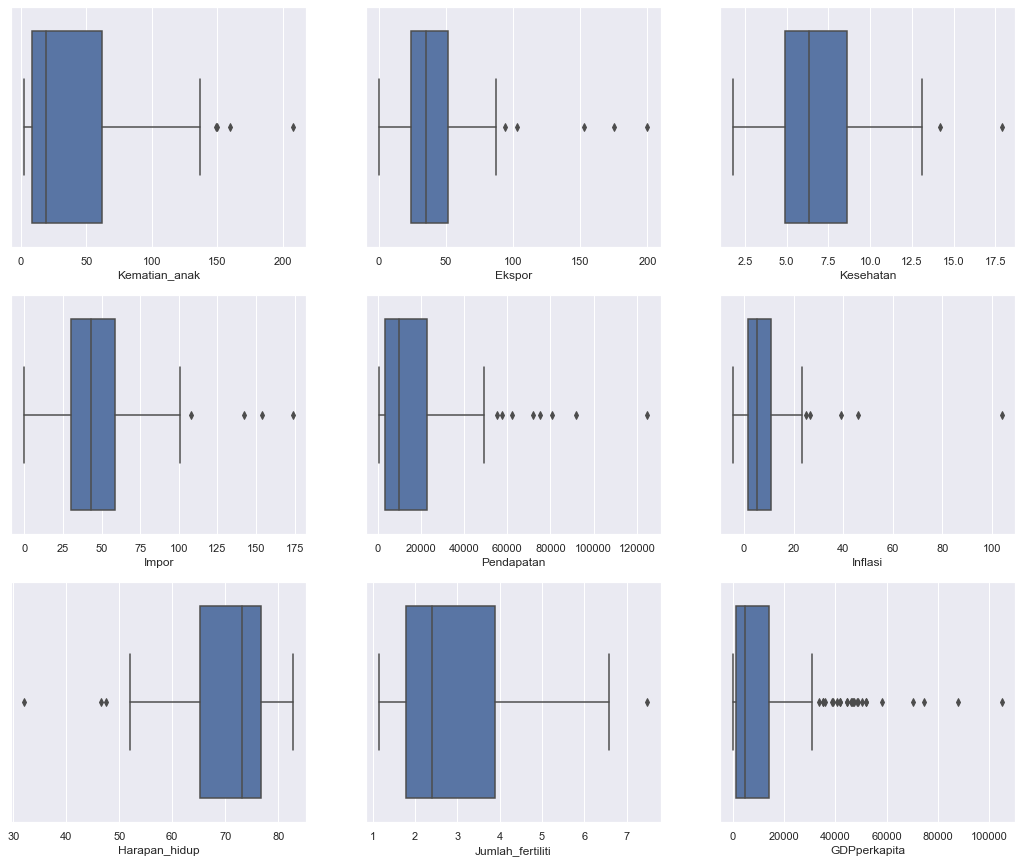

In [20]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (18,15))
counter = 1
for i in range(3):
    for j in range(3):
        sns.boxplot(data = data_negara, x = data_negara.columns[counter], ax = ax[i][j])
        counter += 1

Handling outlier hanya dilakukan pada kolom GDP

In [21]:
#daftar outlier kolom GDPperkapita
data_negara[get_outliers(data_negara['GDPperkapita'])].head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400


In [22]:
data_negara2 = data_negara[~get_outliers(data_negara['GDPperkapita'])].copy()
# data_negara[get_outliers(data_negara['Pendapatan'])]
data_negara2.reset_index(inplace = True, drop = True)
data_negara2.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [23]:
data_negara2.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
data_negara2.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000
mean,44.112676,37.970415,6.424014,46.598351,10935.65493,8.599683,68.806338,3.149014,6340.943662
std,41.038923,21.839432,2.369044,21.142601,9895.15270,11.112812,8.490539,1.553241,7110.006849
min,3.200000,0.109000,1.970000,0.065900,609.00000,-4.210000,32.100000,1.230000,231.000000
25%,13.900000,22.800000,4.872500,31.325000,2715.00000,2.342500,62.825000,1.890000,1205.000000
50%,26.300000,33.050000,5.990000,44.100000,7940.00000,5.935000,70.450000,2.630000,3575.000000
75%,63.850000,50.200000,7.887500,58.825000,16150.00000,11.975000,75.475000,4.475000,8637.500000
max,208.000000,153.000000,14.200000,154.000000,45400.00000,104.000000,81.900000,7.490000,30800.000000


In [25]:
data_negara2[get_outliers(data_negara2['Pendapatan'])]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
9,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700
97,Oman,11.7,65.7,2.77,41.2,45300,15.60,76.1,2.90,19300
109,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.20,75.1,2.96,19300


In [26]:
data_negara2 = data_negara2[~get_outliers(data_negara2['Pendapatan'])]
data_negara2.reset_index(inplace = True, drop = True)
data_negara2

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
134,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
135,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
136,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
137,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### Setelah handling outlier

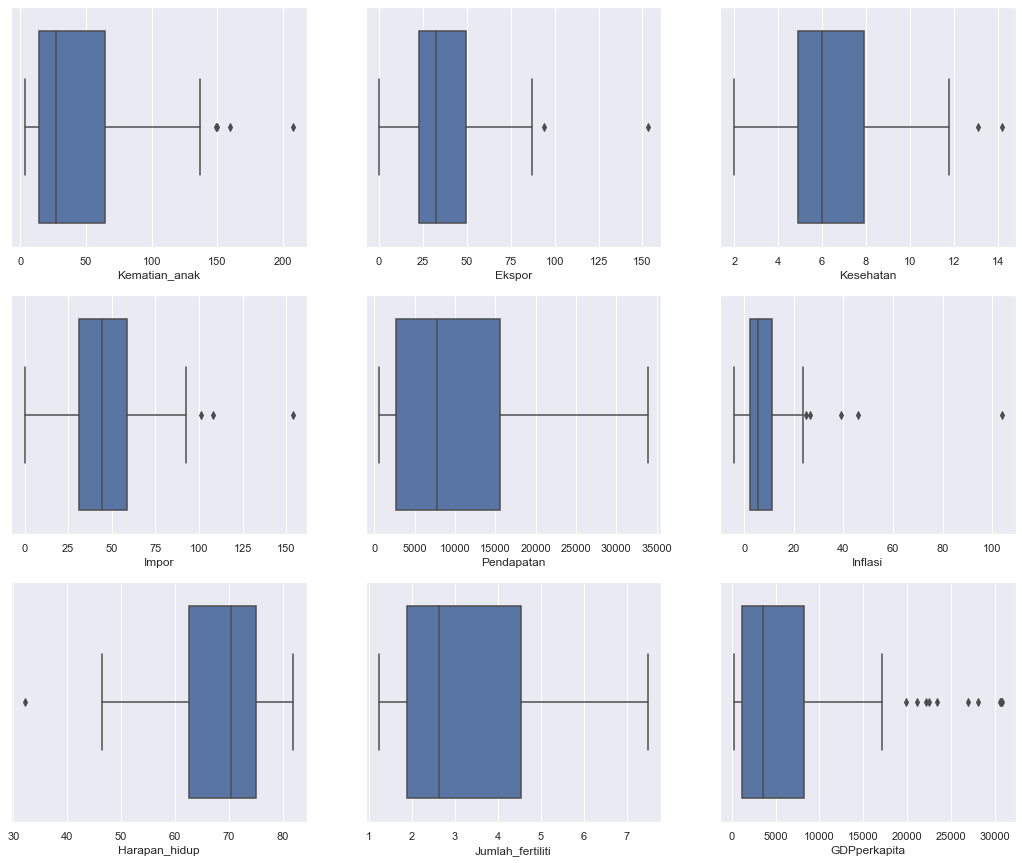

In [27]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (18,15))
counter2 = 1
for i in range(3):
    for j in range(3):
        sns.boxplot(data = data_negara2, x = data_negara2.columns[counter2], ax = ax[i][j])
        counter2 += 1

In [28]:
data_negara2[get_outliers(data_negara2['GDPperkapita'])]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
8,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
36,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
37,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
50,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900
62,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600
82,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
102,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500
112,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
115,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100
116,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700


In [29]:
data_negara2.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
data_plot[0]

,Negara,Kematian_anak
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0
3,Angola,119.0
25,Burkina Faso,116.0
37,"Congo, Dem. Rep.",116.0


# 4. Scaling Data

### Tanpa Handling Outlier

In [31]:
sc = StandardScaler()
#GDPperkapita vs pendapatan
data1_out = data_negara.drop(data_negara.columns[[0,1,2,3,4,6,7,8]], axis = 1).copy()
data1_out_scale = sc.fit_transform(data1_out)

#Harapan hidup vs kematian anak
data2_out = data_negara.drop(data_negara.columns[[0,2,3,4,5,6,8,9]], axis = 1).copy()
data2_out_scale = sc.fit_transform(data2_out)

### Handling Outlier

In [32]:
sc = StandardScaler()
#GDPperkapita vs pendapatan
data1 = data_negara2.drop(data_negara2.columns[[0,1,2,3,4,6,7,8]], axis = 1).copy()
data1_scale = sc.fit_transform(data1)

#Harapan hidup vs kematian anak
data2= data_negara2.drop(data_negara2.columns[[0,2,3,4,5,6,8,9]], axis = 1).copy()
data2_scale = sc.fit_transform(data2)

# 5. K-Means Clustering

In [33]:
#fungsi cek sillhoute untuk tiap besar kluster

def cek_silhoutte(data):
    for i in range(2,10):
        kmeans1 = KMeans(n_clusters = i, init='k-means++', random_state=42).fit(data)
        labels1 = kmeans1.labels_
        print("Koefisien silhoutte saat cluster = {} adalah {}".format(i, silhouette_score(data, labels = labels1)))

### Tanpa Handling Outlier

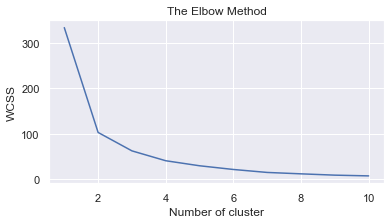

In [34]:
#clustering ke1
data1_out_clust = pd.DataFrame(data=data1_out_scale, columns=['Pendapatan','GDPperkapita'])
# data1_out_clust['label'] = labels1
wcss1 = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data1_out_clust)
  wcss1.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(6,3))
plt.plot(range(1,11), wcss1)
ax.set(xlabel ='Number of cluster' , ylabel = 'WCSS' , title = 'The Elbow Method')
plt.show()

In [35]:
cek_silhoutte(data1_out_scale)

Koefisien silhoutte saat cluster = 2 adalah 0.7272625121110462
Koefisien silhoutte saat cluster = 3 adalah 0.7128549567477928
Koefisien silhoutte saat cluster = 4 adalah 0.6139089213550839
Koefisien silhoutte saat cluster = 5 adalah 0.5743706633872244
Koefisien silhoutte saat cluster = 6 adalah 0.5933769661396423
Koefisien silhoutte saat cluster = 7 adalah 0.5948445462265111
Koefisien silhoutte saat cluster = 8 adalah 0.5966845824052814
Koefisien silhoutte saat cluster = 9 adalah 0.5523633271689506


clustering ke-1 dengan outlier


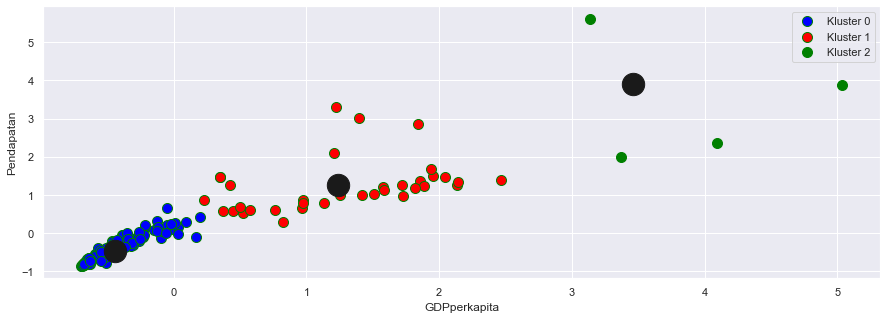

In [36]:
print("clustering ke-1 dengan outlier")
kmeans1 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data1_out_scale )
labels1 = kmeans1.labels_
data1_out_clust['label'] = labels1
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(data1_out_clust['GDPperkapita'][data1_out_clust.label == 0], data1_out_clust['Pendapatan'][data1_out_clust.label == 0], c='blue', s=100, edgecolor='green', label = 'Kluster 0')
plt.scatter(data1_out_clust['GDPperkapita'][data1_out_clust.label == 1], data1_out_clust['Pendapatan'][data1_out_clust.label == 1], c='red', s=100, edgecolor='green',label = 'Kluster 1')
plt.scatter(data1_out_clust['GDPperkapita'][data1_out_clust.label == 2], data1_out_clust['Pendapatan'][data1_out_clust.label == 2], c='green', s=100, edgecolor='green',label = 'Kluster 2')
plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
ax.set(xlabel = 'GDPperkapita', ylabel = 'Pendapatan')
plt.legend()
plt.show()

In [37]:
data1_out_clust.insert(0, 'Negara', data_negara['Negara'])

In [38]:
data1_out_clust[data1_out_clust['label'] == 0].head()

,Negara,Pendapatan,GDPperkapita,label
0,Afghanistan,-0.808245,-0.679180,0
1,Albania,-0.375369,-0.485623,0
2,Algeria,-0.220844,-0.465376,0
3,Angola,-0.585043,-0.516268,0
4,Antigua and Barbuda,0.101732,-0.041817,0


In [39]:
data1_out_fix = data1_out.copy()
data1_out_fix['label'] = labels1
data1_out_fix.insert(0, 'Negara', data_negara['Negara'])

In [40]:
data1_out_fix.head()

,Negara,Pendapatan,GDPperkapita,label
0,Afghanistan,1610,553,0
1,Albania,9930,4090,0
2,Algeria,12900,4460,0
3,Angola,5900,3530,0
4,Antigua and Barbuda,19100,12200,0


In [41]:
data1_out_fix[(data1_out_fix['GDPperkapita'] < 483) & (data1_out_fix['Pendapatan'] < 1221 ) & (data1_out_fix.label == 0) ]

,Negara,Pendapatan,GDPperkapita,label
26,Burundi,764,231,0
31,Central African Republic,888,446,0
37,"Congo, Dem. Rep.",609,334,0
88,Liberia,700,327,0
94,Malawi,1030,459,0
106,Mozambique,918,419,0
112,Niger,814,348,0
132,Sierra Leone,1220,399,0


In [42]:
data1_out_fix[data1_out_fix.label == 0].head()

,Negara,Pendapatan,GDPperkapita,label
0,Afghanistan,1610,553,0
1,Albania,9930,4090,0
2,Algeria,12900,4460,0
3,Angola,5900,3530,0
4,Antigua and Barbuda,19100,12200,0


clustering ke-1 dengan outlier


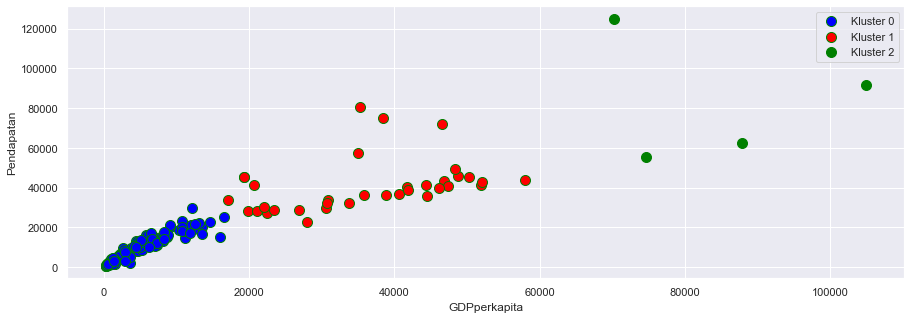

In [43]:
print("clustering ke-1 dengan outlier")
kmeans1 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data1_out_scale )
labels1 = kmeans1.labels_
data1_out_clust['label'] = labels1
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(data1_out_fix['GDPperkapita'][data1_out_fix.label == 0], data1_out_fix['Pendapatan'][data1_out_fix.label == 0], c='blue', s=100, edgecolor='green', label = 'Kluster 0')
plt.scatter(data1_out_fix['GDPperkapita'][data1_out_fix.label == 1], data1_out_fix['Pendapatan'][data1_out_fix.label == 1], c='red', s=100, edgecolor='green',label = 'Kluster 1')
plt.scatter(data1_out_fix['GDPperkapita'][data1_out_fix.label == 2], data1_out_fix['Pendapatan'][data1_out_fix.label == 2], c='green', s=100, edgecolor='green',label = 'Kluster 2')
# plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
ax.set(xlabel = 'GDPperkapita', ylabel = 'Pendapatan')
plt.legend()
plt.show()

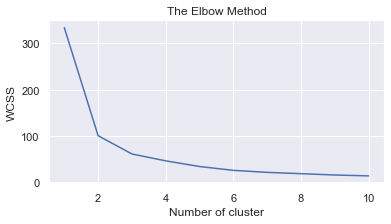

In [44]:
#clustering ke2
data2_out_clust = pd.DataFrame(data=data2_out_scale, columns=['Kematian_anak','Harapan_hidup'])
# data1_out_clust['label'] = labels1
wcss2 = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data2_out_clust)
  wcss2.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(6,3))
plt.plot(range(1,11), wcss2)
ax.set(xlabel ='Number of cluster' , ylabel = 'WCSS' , title = 'The Elbow Method')
plt.show()

In [45]:
cek_silhoutte(data2_out_scale)

Koefisien silhoutte saat cluster = 2 adalah 0.644009650033211
Koefisien silhoutte saat cluster = 3 adalah 0.5588335433575887
Koefisien silhoutte saat cluster = 4 adalah 0.4689268230881661
Koefisien silhoutte saat cluster = 5 adalah 0.47570311775731855
Koefisien silhoutte saat cluster = 6 adalah 0.4608076762151421
Koefisien silhoutte saat cluster = 7 adalah 0.46249046229508356
Koefisien silhoutte saat cluster = 8 adalah 0.46106048386704945
Koefisien silhoutte saat cluster = 9 adalah 0.4639661899693502


clustering ke-2 dengan outlier


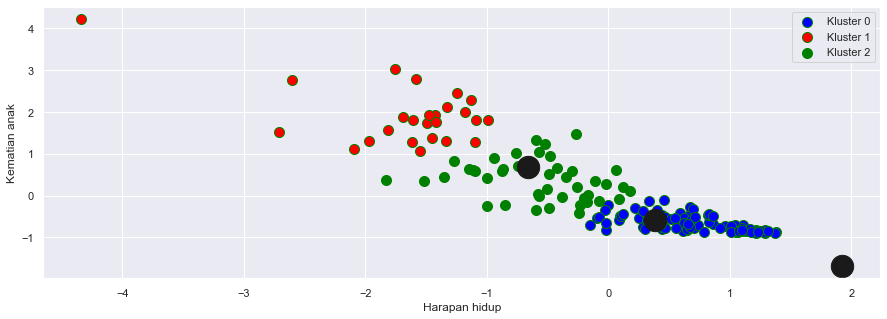

In [46]:
print("clustering ke-2 dengan outlier")
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data2_out_scale )
labels2 = kmeans2.labels_
data2_out_clust['label'] = labels2
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(data2_out_clust['Harapan_hidup'][data2_out_clust.label == 0], data2_out_clust['Kematian_anak'][data2_out_clust.label == 0], c='blue', s=100, edgecolor='green', label = 'Kluster 0')
plt.scatter(data2_out_clust['Harapan_hidup'][data2_out_clust.label == 1], data2_out_clust['Kematian_anak'][data2_out_clust.label == 1], c='red', s=100, edgecolor='green',label = 'Kluster 1')
plt.scatter(data2_out_clust['Harapan_hidup'][data2_out_clust.label == 2], data2_out_clust['Kematian_anak'][data2_out_clust.label == 2], c='green', s=100, edgecolor='green',label = 'Kluster 2')
plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
plt.legend()
ax.set(xlabel = 'Harapan hidup', ylabel = 'Kematian anak')
plt.show()

In [47]:
data2_out_clust.insert(0,'Negara',data_negara['Negara'])

In [48]:
data2_out_clust[data2_out_clust.label == 1].head()

,Negara,Kematian_anak,Harapan_hidup,label
0,Afghanistan,1.291532,-1.619092,1
3,Angola,2.007808,-1.179234,1
17,Benin,1.808842,-0.987502,1
25,Burkina Faso,1.933196,-1.427359,1
26,Burundi,1.376093,-1.449916,1


In [49]:
data2_out.insert(0,'Negara',data_negara['Negara'])

In [50]:
data2_out_fix = data2_out.copy()
data2_out_fix['label'] = labels2
# data2_out_fix[(data2_out_fix.Kematian_anak > 116)&(data2_out_fix.Harapan_hidup < 56.3)&(data2_out_fix.label == 1)]
data2_out_fix.head()

,Negara,Kematian_anak,Harapan_hidup,label
0,Afghanistan,90.2,56.2,1
1,Albania,16.6,76.3,0
2,Algeria,27.3,76.5,0
3,Angola,119.0,60.1,1
4,Antigua and Barbuda,10.3,76.8,0


clustering ke-2 dengan outlier


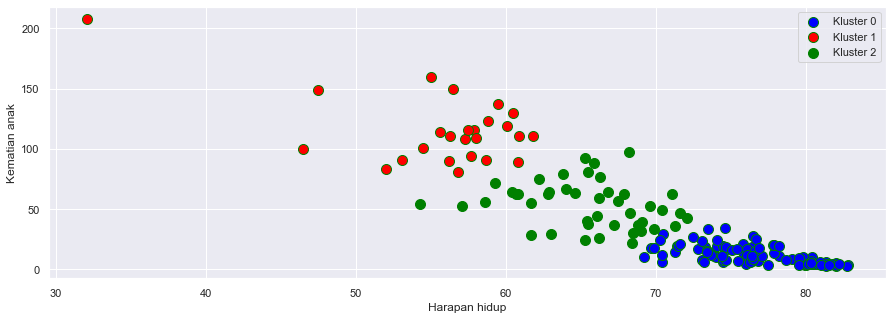

In [51]:
print("clustering ke-2 dengan outlier")
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data2_out_scale )
labels2 = kmeans2.labels_
data2_out_clust['label'] = labels2
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(data2_out_fix['Harapan_hidup'][data2_out_fix.label == 0], data2_out_fix['Kematian_anak'][data2_out_fix.label == 0], c='blue', s=100, edgecolor='green', label = 'Kluster 0')
plt.scatter(data2_out_fix['Harapan_hidup'][data2_out_fix.label == 1], data2_out_fix['Kematian_anak'][data2_out_fix.label == 1], c='red', s=100, edgecolor='green',label = 'Kluster 1')
plt.scatter(data2_out_fix['Harapan_hidup'][data2_out_fix.label == 2], data2_out_fix['Kematian_anak'][data2_out_fix.label == 2], c='green', s=100, edgecolor='green',label = 'Kluster 2')
# plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
plt.legend()
ax.set(xlabel = 'Harapan hidup', ylabel = 'Kematian anak')
plt.show()

### Handling Outlier

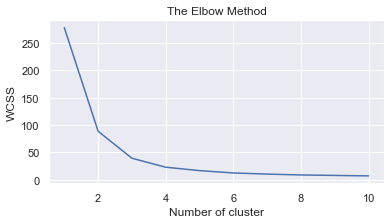

In [52]:
#clustering ke1
data1_clust = pd.DataFrame(data=data1_scale, columns=['Pendapatan','GDPperkapita'])
# data1_out_clust['label'] = labels1
wcss3 = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data1_clust)
  wcss3.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(6,3))
plt.plot(range(1,11), wcss3)
ax.set(xlabel ='Number of cluster' , ylabel = 'WCSS' , title = 'The Elbow Method')
plt.show()

In [53]:
cek_silhoutte(data1_scale)

Koefisien silhoutte saat cluster = 2 adalah 0.6478392871471957
Koefisien silhoutte saat cluster = 3 adalah 0.6202038348546097
Koefisien silhoutte saat cluster = 4 adalah 0.5774346136445602
Koefisien silhoutte saat cluster = 5 adalah 0.5576012038283329
Koefisien silhoutte saat cluster = 6 adalah 0.553340998884206
Koefisien silhoutte saat cluster = 7 adalah 0.5234209157141259
Koefisien silhoutte saat cluster = 8 adalah 0.5107227389726958
Koefisien silhoutte saat cluster = 9 adalah 0.5077107701038954


clustering ke-1 tanpa outlier


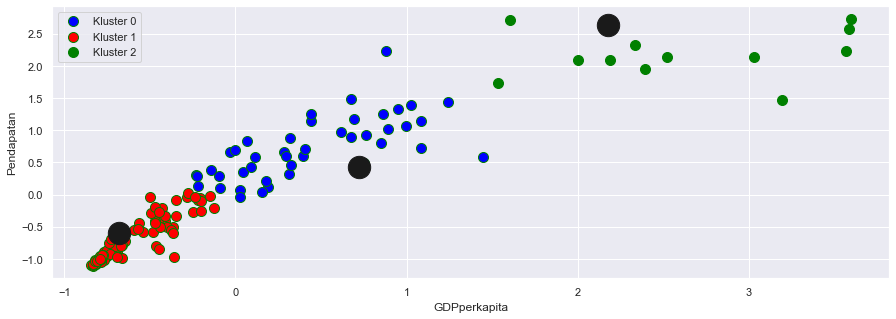

In [54]:
print("clustering ke-1 tanpa outlier")
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data1_scale)
labels3 = kmeans3.labels_
data1_clust['label'] = labels3
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(data1_clust['GDPperkapita'][data1_clust.label == 0], data1_clust['Pendapatan'][data1_clust.label == 0], c='blue', s=100, edgecolor='green', label = 'Kluster 0')
plt.scatter(data1_clust['GDPperkapita'][data1_clust.label == 1], data1_clust['Pendapatan'][data1_clust.label == 1], c='red', s=100, edgecolor='green', label = 'Kluster 1')
plt.scatter(data1_clust['GDPperkapita'][data1_clust.label == 2], data1_clust['Pendapatan'][data1_clust.label == 2], c='green', s=100, edgecolor='green', label = 'Kluster 2')
plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
ax.set(xlabel = 'GDPperkapita', ylabel = 'Pendapatan')
plt.legend()
plt.show()

In [55]:
data1_clust.insert(0, 'Negara', data_negara2['Negara'])

In [56]:
data1_clust[data1_clust.label == 1].head()

,Negara,Pendapatan,GDPperkapita,label
0,Afghanistan,-0.993085,-0.799479,1
1,Albania,-0.033836,-0.285171,1
3,Angola,-0.498472,-0.366600,1
6,Armenia,-0.406237,-0.411676,1
9,Bangladesh,-0.897391,-0.769670,1


In [57]:
data1_fix = pd.DataFrame(data = sc.inverse_transform(data1_scale), columns = ['Pendapatan', 'GDPperkapita'])
data1_fix['Negara'] =data_negara2['Negara']

In [58]:
data1_fix = data1.copy()
data1_fix.insert(0, 'Negara', data_negara2['Negara'])

In [59]:
data1_fix['label'] = labels3
data1_fix[data1_fix.label == 1]

,Negara,Pendapatan,GDPperkapita,label
0,Afghanistan,1610,553,1
1,Albania,9930,4090,1
3,Angola,5900,3530,1
6,Armenia,6700,3220,1
9,Bangladesh,2440,758,1
...,...,...,...,...
133,Uzbekistan,4240,1380,1
134,Vanuatu,2950,2970,1
136,Vietnam,4490,1310,1
137,Yemen,4480,1310,1


In [60]:
data1_fix['label'] = labels3
data1_fix[(data1_fix['GDPperkapita'] < 483) & (data1_fix['Pendapatan'] < 1221 ) & (data1_fix.label == 1)]

,Negara,Pendapatan,GDPperkapita,label
21,Burundi,764,231,1
25,Central African Republic,888,446,1
31,"Congo, Dem. Rep.",609,334,1
73,Liberia,700,327,1
78,Malawi,1030,459,1
90,Mozambique,918,419,1
94,Niger,814,348,1
110,Sierra Leone,1220,399,1


clustering ke-1 tanpa outlier


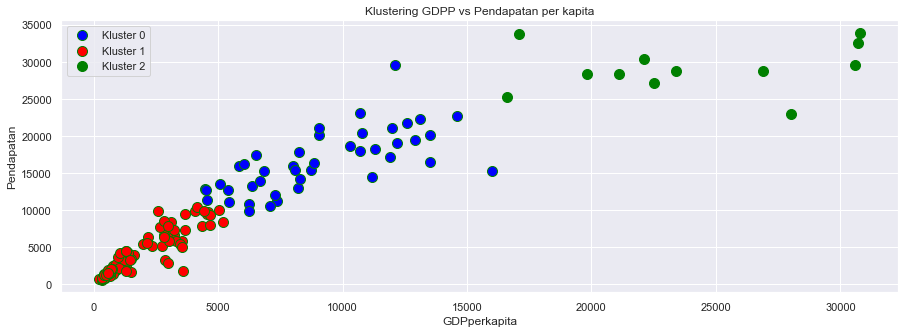

In [61]:
print("clustering ke-1 tanpa outlier")
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data1_scale)
labels3 = kmeans3.labels_
data1_clust['label'] = labels3
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(data1_fix['GDPperkapita'][data1_fix.label == 0], data1_fix['Pendapatan'][data1_fix.label == 0], c='blue', s=100, edgecolor='green', label = 'Kluster 0')
plt.scatter(data1_fix['GDPperkapita'][data1_fix.label == 1], data1_fix['Pendapatan'][data1_fix.label == 1], c='red', s=100, edgecolor='green', label = 'Kluster 1')
plt.scatter(data1_fix['GDPperkapita'][data1_fix.label == 2], data1_fix['Pendapatan'][data1_fix.label == 2], c='green', s=100, edgecolor='green', label = 'Kluster 2')
# plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
ax.set(xlabel = 'GDPperkapita', ylabel = 'Pendapatan', title = 'Klustering GDPP vs Pendapatan per kapita')
plt.legend()
plt.show()

In [62]:
gabung1 = pd.merge(data1_clust[data1_clust.label == 1], data1_out_clust[data1_out_clust['label'] == 0], on = 'Negara', how = 'inner' )
gabung1

,Negara,Pendapatan_x,GDPperkapita_x,label_x,Pendapatan_y,GDPperkapita_y,label_y
0,Afghanistan,-0.993085,-0.799479,1,-0.808245,-0.679180,0
1,Albania,-0.033836,-0.285171,1,-0.375369,-0.485623,0
2,Angola,-0.498472,-0.366600,1,-0.585043,-0.516268,0
3,Armenia,-0.406237,-0.411676,1,-0.543421,-0.533233,0
4,Bangladesh,-0.897391,-0.769670,1,-0.765062,-0.667961,0
...,...,...,...,...,...,...,...
79,Uzbekistan,-0.689861,-0.679227,1,-0.671411,-0.633923,0
80,Vanuatu,-0.838591,-0.448028,1,-0.738527,-0.546913,0
81,Vietnam,-0.661037,-0.689405,1,-0.658404,-0.637754,0
82,Yemen,-0.662190,-0.689405,1,-0.658924,-0.637754,0


In [63]:
gabung = (data1_clust[data1_clust.label == 1].merge(data1_out_clust[data1_out_clust['label'] == 0], on='Negara', how='right', indicator=True).query('_merge == "right_only"').drop('_merge', 1))
# gabung[gabung.Negara == 'Niger']
gabung.shape

(44, 7)

In [64]:
data1_fix[data1_fix.label == 2].sort_values('Pendapatan', ascending = True)

,Negara,Pendapatan,GDPperkapita,label
8,Bahamas,22900,28000,2
111,Slovak Republic,25200,16600,2
102,Portugal,27200,22500,2
37,Czech Republic,28300,19800,2
82,Malta,28300,21100,2
50,Greece,28700,26900,2
112,Slovenia,28700,23400,2
62,Israel,29600,30600,2
115,South Korea,30400,22100,2
116,Spain,32500,30700,2


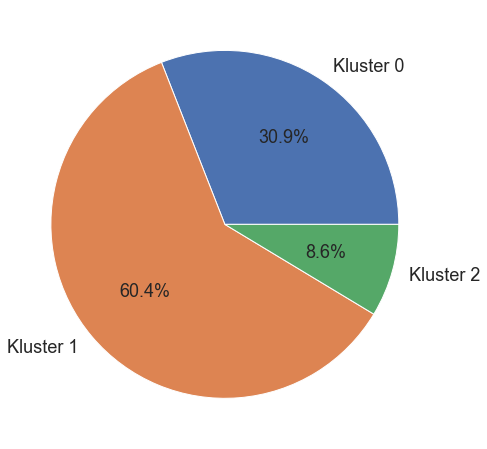

In [65]:
ax, fig = plt.subplots(figsize = (12,8))
plt.pie([43,84,12] , labels = ['Kluster 0','Kluster 1','Kluster 2'],autopct='%1.1f%%', textprops={'fontsize': 18})
plt.show()

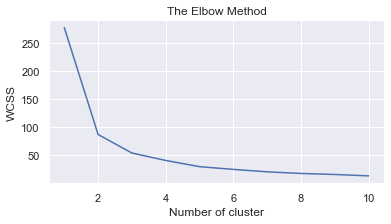

In [66]:
#clustering ke2
data2_clust = pd.DataFrame(data=data2_scale, columns=['Kematian_anak','Harapan_hidup'])
# data1_out_clust['label'] = labels1
wcss4 = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data2_clust)
  wcss4.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(6,3))
plt.plot(range(1,11), wcss4)
ax.set(xlabel ='Number of cluster' , ylabel = 'WCSS' , title = 'The Elbow Method')
plt.show()

clustering ke-2 tanpa outlier


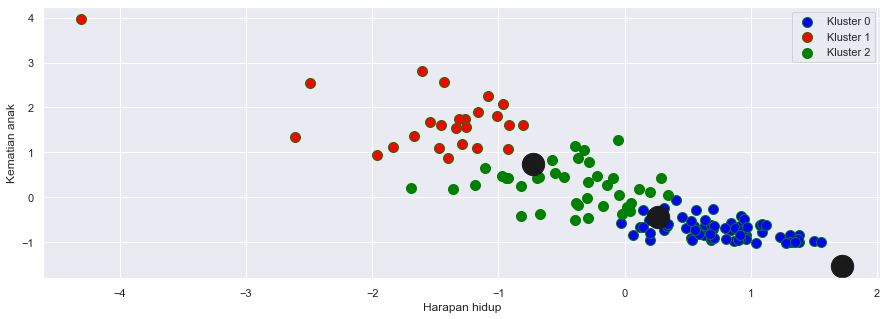

In [67]:
print("clustering ke-2 tanpa outlier")
kmeans4 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data2_scale )
labels4 = kmeans4.labels_
data2_clust['label'] = labels4
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(data2_clust['Harapan_hidup'][data2_clust.label == 0], data2_clust['Kematian_anak'][data2_clust.label == 0], c='blue', s=100, edgecolor='green', label = 'Kluster 0')
plt.scatter(data2_clust['Harapan_hidup'][data2_clust.label == 1], data2_clust['Kematian_anak'][data2_clust.label == 1], c='red', s=100, edgecolor='green',label = 'Kluster 1')
plt.scatter(data2_clust['Harapan_hidup'][data2_clust.label == 2], data2_clust['Kematian_anak'][data2_clust.label == 2], c='green', s=100, edgecolor='green',label = 'Kluster 2')
plt.scatter(kmeans4.cluster_centers_[:, 0],kmeans4.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
plt.legend()
ax.set(xlabel = 'Harapan hidup', ylabel = 'Kematian anak')
plt.show()

In [68]:
cek_silhoutte(data2_scale)

Koefisien silhoutte saat cluster = 2 adalah 0.6192194868645086
Koefisien silhoutte saat cluster = 3 adalah 0.5321639095876353
Koefisien silhoutte saat cluster = 4 adalah 0.5337772473776279
Koefisien silhoutte saat cluster = 5 adalah 0.45777830162297833
Koefisien silhoutte saat cluster = 6 adalah 0.3856527620566458
Koefisien silhoutte saat cluster = 7 adalah 0.38128391483820273
Koefisien silhoutte saat cluster = 8 adalah 0.38769334206717954
Koefisien silhoutte saat cluster = 9 adalah 0.366993409622006


In [69]:
data2_fix = pd.DataFrame(data = sc.inverse_transform(data2_scale), columns = ['Kematian_anak', 'Harapan_hidup'])
data2_fix.insert(0, 'Negara', data_negara2['Negara'])

In [70]:
data2_fix['label'] = labels4
data2_fix.head()

,Negara,Kematian_anak,Harapan_hidup,label
0,Afghanistan,90.2,56.2,1
1,Albania,16.6,76.3,0
2,Algeria,27.3,76.5,0
3,Angola,119.0,60.1,1
4,Antigua and Barbuda,10.3,76.8,0


In [71]:
data2_fix[data2_fix.label == 1]

,Negara,Kematian_anak,Harapan_hidup,label
0,Afghanistan,90.2,56.2,1
3,Angola,119.0,60.1,1
13,Benin,111.0,61.8,1
20,Burkina Faso,116.0,57.9,1
21,Burundi,93.6,57.7,1
23,Cameroon,108.0,57.3,1
25,Central African Republic,149.0,47.5,1
26,Chad,150.0,56.5,1
31,"Congo, Dem. Rep.",116.0,57.5,1
34,Cote d'Ivoire,111.0,56.3,1


clustering ke-2 tanpa outlier


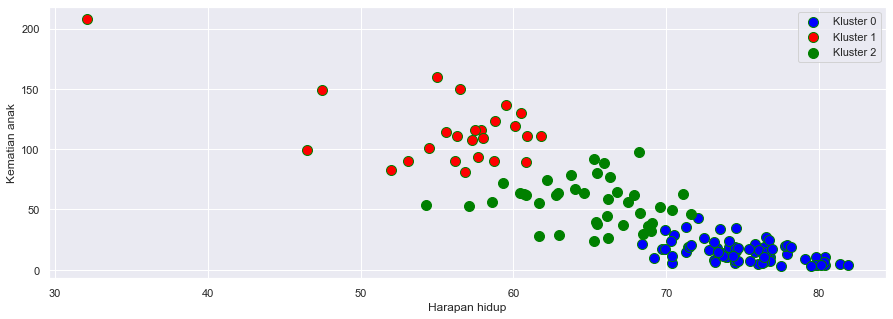

In [72]:
print("clustering ke-2 tanpa outlier")
kmeans4 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data2_scale )
labels4 = kmeans4.labels_
data2_clust['label'] = labels4
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(data2_fix['Harapan_hidup'][data2_fix.label == 0], data2_fix['Kematian_anak'][data2_fix.label == 0], c='blue', s=100, edgecolor='green', label = 'Kluster 0')
plt.scatter(data2_fix['Harapan_hidup'][data2_fix.label == 1], data2_fix['Kematian_anak'][data2_fix.label == 1], c='red', s=100, edgecolor='green',label = 'Kluster 1')
plt.scatter(data2_fix['Harapan_hidup'][data2_fix.label == 2], data2_fix['Kematian_anak'][data2_fix.label == 2], c='green', s=100, edgecolor='green',label = 'Kluster 2')
# plt.scatter(kmeans4.cluster_centers_[:, 0],kmeans4.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
plt.legend()
ax.set(xlabel = 'Harapan hidup', ylabel = 'Kematian anak')
plt.show()

In [73]:
data2_fix.groupby('label').count()

,Negara,Kematian_anak,Harapan_hidup
label,,,
0,74,74,74
1,25,25,25
2,40,40,40


In [74]:
data2_fix[data2_fix.label == 0]

,Negara,Kematian_anak,Harapan_hidup,label
1,Albania,16.6,76.3,0
2,Algeria,27.3,76.5,0
4,Antigua and Barbuda,10.3,76.8,0
5,Argentina,14.5,75.8,0
6,Armenia,18.1,73.3,0
...,...,...,...,...
128,Turkey,19.1,78.2,0
131,Ukraine,11.7,70.4,0
132,Uruguay,10.6,76.4,0
135,Venezuela,17.1,75.4,0


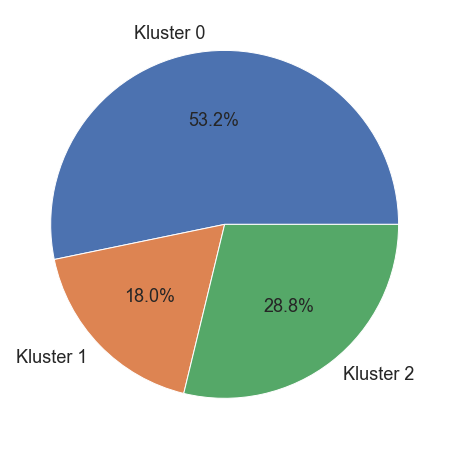

In [75]:
ax, fig = plt.subplots(figsize = (12,8))
plt.pie([74,25,40] , labels = ['Kluster 0','Kluster 1','Kluster 2'],autopct='%1.1f%%', textprops={'fontsize': 18})
plt.show()

In [81]:
rek1 = data1_fix[data1_fix.label == 1].sort_values('GDPperkapita', ascending = True).head(20)
rek2 = data1_fix[data1_fix.label == 1].sort_values('Pendapatan', ascending = True).head(20)
rek3 = data2_fix[data2_fix.label == 1].sort_values('Harapan_hidup', ascending = True).head(20)
rek4 = data2_fix[data2_fix.label == 1].sort_values('Kematian_anak', ascending = True).tail(20)
res1 = pd.merge(rek2,rek3, on = 'Negara', how = 'inner')
res2 = pd.merge(res1,rek1, on = 'Negara', how = 'inner')
res3 = pd.merge(res2, rek4, on = 'Negara', how = 'inner')

# 6. Result

In [82]:
print('Daftar negara yang berhak mendapatkan bantuan')
res3.Negara

Daftar negara yang berhak mendapatkan bantuan


0             Congo, Dem. Rep.
1                      Burundi
2                        Niger
3     Central African Republic
4                   Mozambique
5                       Malawi
6                       Guinea
7                 Sierra Leone
8                Guinea-Bissau
9                 Burkina Faso
10                       Haiti
Name: Negara, dtype: object